In [8]:
from sklearn import datasets, neighbors, metrics
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)])
irisdf

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,ctarget
0,5.1,3.5,1.4,0.2,0,r
1,4.9,3.0,1.4,0.2,0,r
2,4.7,3.2,1.3,0.2,0,r
3,4.6,3.1,1.5,0.2,0,r
4,5.0,3.6,1.4,0.2,0,r
5,5.4,3.9,1.7,0.4,0,r
6,4.6,3.4,1.4,0.3,0,r
7,5.0,3.4,1.5,0.2,0,r
8,4.4,2.9,1.4,0.2,0,r
9,4.9,3.1,1.5,0.1,0,r


       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.054000           3.758667   
std             0.828066          0.433594           1.764420   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)      target  
count        150.000000  150.000000  
mean           1.198667    1.000000  
std            0.763161    0.819232  
min            0.100000    0.000000  
25%            0.300000    0.000000  
50%            1.300000    1.000000  
75%            1.800000    2.000000  
max            2.500000    2.000000  


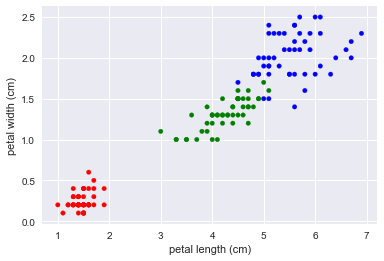

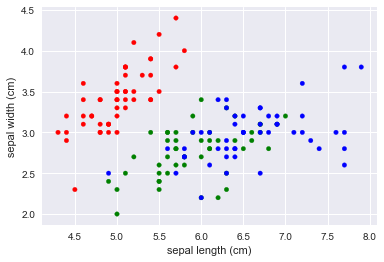

In [14]:
iris = datasets.load_iris()
irisdf = pd.DataFrame(iris.data, columns=iris.feature_names)
irisdf['target'] = iris.target
cmap = {'0': 'r', '1': 'g', '2': 'b' }
irisdf['ctarget'] = irisdf.target.apply(lambda x: cmap[str(x)])
irisdf.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=irisdf.ctarget)
irisdf.plot('sepal length (cm)', 'sepal width (cm)', kind='scatter', c=irisdf.ctarget)
print(irisdf.describe())

In [13]:
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    else:
        return 1

predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions
print(len(irisdf)) #number of data points
print(len(irisdf[irisdf.target == irisdf.predictions])) #number of correct prediction
print(float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf))

150
100
0.6666666666666666


### Starter Code

Work on improving the classifier below.

In [16]:
def my_classifier(row):
    if row['petal length (cm)'] < 2:
        return 0
    elif row['petal length (cm)'] < 4.9:
        return 1
    else:
        return 2

predictions = irisdf.apply(my_classifier, axis=1)

irisdf['predictions'] = predictions
print(len(irisdf)) #number of data points
print(len(irisdf[irisdf.target == irisdf.predictions])) #number of correct prediction
print(float(len(irisdf[irisdf.target == irisdf.predictions])) / len(irisdf))

150
143
0.9533333333333334


### Using distance: KNN implementation

In [17]:
from sklearn import datasets, neighbors, metrics
import pandas as pd

iris = datasets.load_iris()
# n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform') # each nearest neighbour is weighted the same
                                                                       # in terms of importance
                                                                       # i.e. distance does not count for importance
knn.fit(iris.data[:,2:], iris.target)
print(knn.predict(iris.data[:,2:]))
print(iris.target)

print(knn.score(iris.data[:,2:], iris.target))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.96


Do we see a change in performance when using the distance weight?

In [18]:
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance') # weight will be 1/distance
                                                                        # i.e. the nearer points get a larger weight
knn.fit(iris.data[:,2:], iris.target)
print(knn.predict(iris.data[:,2:]))
print(iris.target)

print(knn.score(iris.data[:,2:], iris.target))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.993333333333


In [25]:
k_values = range(1,11)
weights_values = ['distance','uniform']
scores = []
for k in k_values:
    for weights in weights_values:
        knn = neighbors.KNeighborsClassifier(n_neighbors=k, weights=weights)
        knn.fit(iris.data[:,2:], iris.target)
        scores.append(knn.score(iris.data[:,2:], iris.target))
        print('\nk=',k,', weight=',weights,' : ',knn.score(iris.data[:,2:], iris.target))
        
#print(scores)


k= 1 , weight= distance  :  0.993333333333

k= 1 , weight= uniform  :  0.993333333333

k= 2 , weight= distance  :  0.986666666667

k= 2 , weight= uniform  :  0.973333333333

k= 3 , weight= distance  :  0.993333333333

k= 3 , weight= uniform  :  0.98

k= 4 , weight= distance  :  0.993333333333

k= 4 , weight= uniform  :  0.973333333333

k= 5 , weight= distance  :  0.993333333333

k= 5 , weight= uniform  :  0.96

k= 6 , weight= distance  :  0.993333333333

k= 6 , weight= uniform  :  0.966666666667

k= 7 , weight= distance  :  0.993333333333

k= 7 , weight= uniform  :  0.966666666667

k= 8 , weight= distance  :  0.993333333333

k= 8 , weight= uniform  :  0.966666666667

k= 9 , weight= distance  :  0.993333333333

k= 9 , weight= uniform  :  0.96

k= 10 , weight= distance  :  0.993333333333

k= 10 , weight= uniform  :  0.96


uniform


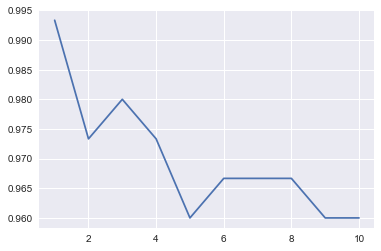

In [33]:
plt.plot(k_values,scores[1::2],)
print('uniform')

distance


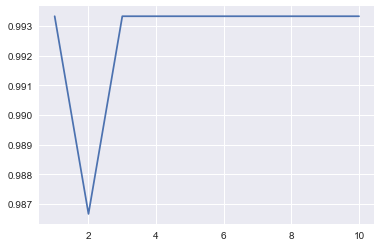

In [34]:
plt.plot(k_values,scores[0::2],)
print('distance')

In [35]:

iris = datasets.load_iris()
# n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance')
knn.fit(iris.data[:,2:], iris.target)

irisdf = pd.DataFrame({'target':iris.target,'prediction':knn.predict(iris.data[:,2:])})

#Precision is the number of True Positives divided by the number of True Positives and False Positives
print(len(irisdf[(irisdf.target == irisdf.prediction)&(irisdf.target == 2)])/
len(irisdf[(irisdf.prediction == 2)]))

#Recall is the number of True Positives divided by the number of True Positives and the number of False Negatives.
print(len(irisdf[(irisdf.target == irisdf.prediction)&(irisdf.target == 2)])/
len(irisdf[(irisdf.target == 2)])) #Recall

0.9803921568627451
1.0


### Implementing weights function

In [39]:
import random
def getWeights(dist):
    a = np.empty(dist.shape)
    for i,ele in enumerate(a):
        for j, inner_elem in enumerate(ele):
            a[i] = random.uniform(0.0,1.0)
    return a
class WeightsClass:
    def __call__(self,dist):
        print()
        a = np.empty(dist.shape)
        for i,ele in enumerate(a):
            for j, inner_elem in enumerate(ele):
                a[i,j] = random.uniform(0.0,1.0)
        return a
    
test = np.empty(10).reshape(2,5)
print(test)
print(getWeights(test))
obj = WeightsClass()
obj(test)

[[  1.00000000e-05   2.00000000e-05   2.50000000e-05   5.00000000e-05
    1.00000000e-04]
 [  2.00000000e-04   2.50000000e-04   5.00000000e-04   1.00000000e-03
    2.00000000e-03]]
[[ 0.583753    0.583753    0.583753    0.583753    0.583753  ]
 [ 0.11402377  0.11402377  0.11402377  0.11402377  0.11402377]]



array([[ 0.19604487,  0.34897813,  0.18475801,  0.96096103,  0.17404931],
       [ 0.56702827,  0.18608992,  0.24279457,  0.11940298,  0.86100596]])

In [40]:
def _check_weights(weights):
    """Check to make sure weights are valid"""
    if weights in (None, 'uniform', 'distance'):
        return weights
    elif callable(weights):
        return weights
    else:
        raise ValueError("weights not recognized: should be 'uniform', "
                         "'distance', or a callable function")

In [55]:
print(_check_weights(obj))
obj = WeightsClass()
iris = datasets.load_iris()
# n_neighbors is our option in KNN. We'll tune this value to attempt to improve our prediction.
knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights=obj)
knn.fit(iris.data[:,2:], iris.target)
print(knn.predict(iris.data[:,2:]))
print(iris.target)

print(knn.score(iris.data[:,2:], iris.target))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1
 1 1 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]

0.953333333333


### Solution to solving K

This is only one approach to the problem, but adding in the 'distance' parameter (instead of uniform) would only be additive. Note the code would need some editing to handle it properly if done in the grid search; alternatively, make the change directly in the estimator.

In [58]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1, weights='uniform')
knn.fit(iris.data[:,2:], iris.target)
print(knn.predict(iris.data[:,2:]))
print(iris.target)
print(knn.score(iris.data[:,2:], iris.target))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.993333333333


In [59]:
n=len(iris.data)
knn = neighbors.KNeighborsClassifier(n_neighbors=n-1, weights='uniform')
knn.fit(iris.data[:,2:], iris.target)
print(knn.predict(iris.data[:,2:]))
print(iris.target)
print(knn.score(iris.data[:,2:], iris.target))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
0.593333333333


In [120]:
from sklearn import grid_search, cross_validation
import matplotlib.pyplot as plt

k = list(range(1,101,1))
weights = ['uniform','distance']
params = [{'n_neighbors':k,'weights':weights}] #,'p':[1,2]}],

kf = cross_validation.KFold(len(irisdf), n_folds = 3, shuffle=True) 

#if you set shuffle=False then all mean and std are 0. This is because the dataset is already sorted into the 
#true groups so the first set, they are all 0, therefore the model will predict all the data points in the model to
#be 0, and similar for the other two groups. Overall, the model will be completely wrong.

gs = grid_search.GridSearchCV(
    estimator=neighbors.KNeighborsClassifier(),
    param_grid=params,
    cv=kf,
)
gs.fit(iris.data, iris.target)
knn_grid_scores = gs.grid_scores_
knn_grid_scores

[mean: 0.96000, std: 0.00000, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.96000, std: 0.00000, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.94667, std: 0.00943, params: {'n_neighbors': 2, 'weights': 'uniform'},
 mean: 0.96000, std: 0.00000, params: {'n_neighbors': 2, 'weights': 'distance'},
 mean: 0.96000, std: 0.00000, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.96000, std: 0.00000, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.95333, std: 0.00943, params: {'n_neighbors': 4, 'weights': 'uniform'},
 mean: 0.96000, std: 0.00000, params: {'n_neighbors': 4, 'weights': 'distance'},
 mean: 0.96000, std: 0.00000, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.96000, std: 0.00000, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.94667, std: 0.00943, params: {'n_neighbors': 6, 'weights': 'uniform'},
 mean: 0.96000, std: 0.00000, params: {'n_neighbors': 6, 'weights': 'distance'},
 mean: 0.96000, std: 0.01633, para

In [121]:
neighbors.KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

distance


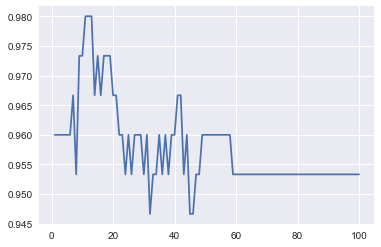

In [122]:
plt.plot(k,[s[1] for s in gs.grid_scores_[1::2]],)
print('distance')

uniform


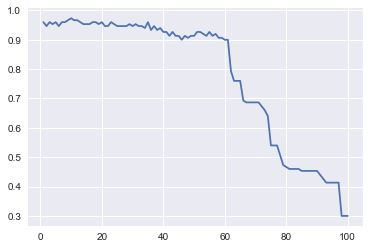

In [123]:
plt.plot(k,[s[1] for s in gs.grid_scores_[0::2]],)
print('uniform')